In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv("Dataset/Titanic-Dataset.csv")

df = pd.DataFrame(titanic_data)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
first_class = df[df['Pclass'] == 1][['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

print('First class Fare Statistics')
print('Mean Fare: ', first_class['Fare'].mean().round())
print('Median Fare: ', first_class['Fare'].median().round())
print('Max Fare: ', first_class['Fare'].max().round())
print('Min Fare: ', first_class['Fare'].min().round())

first_class.head()

First class Fare Statistics
Mean Fare:  84.0
Median Fare:  60.0
Max Fare:  512.0
Min Fare:  0.0


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [10]:
mising_age = first_class['Age'].isnull().sum()
print(f'Missing Age value in first class: {mising_age}')


Missing Age value in first class: 30


In [11]:
first_class_clean = first_class.dropna(subset=['Age'])

print(f'Row before droping NaN: {len(first_class)}')
print(f'Row after droping NaN: {len(first_class_clean)}')

Row before droping NaN: 216
Row after droping NaN: 186


In [12]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix="Embarked")

df = pd.concat([df, embarked_dummies], axis=1)
df= df.drop('Embarked', axis=1)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


In [13]:
df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [32]:
survived_by_sex = df.groupby('Sex')['Survived'].mean()
survived_by_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

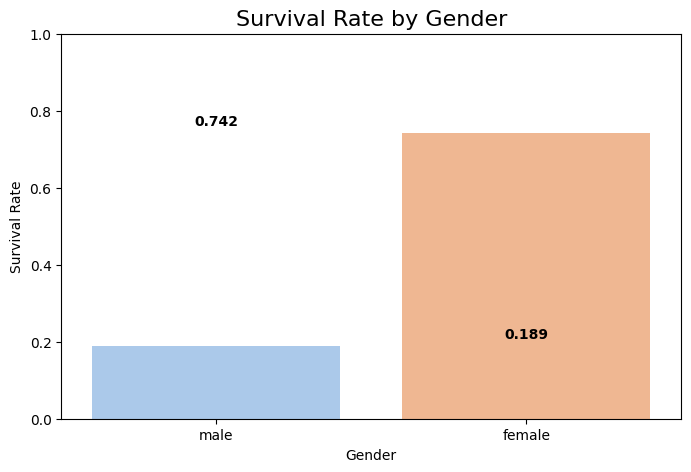

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None, hue='Sex', palette='pastel', legend=False)
plt.title('Survival Rate by Gender', fontsize=16)
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
for i, v in enumerate(survived_by_sex):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()

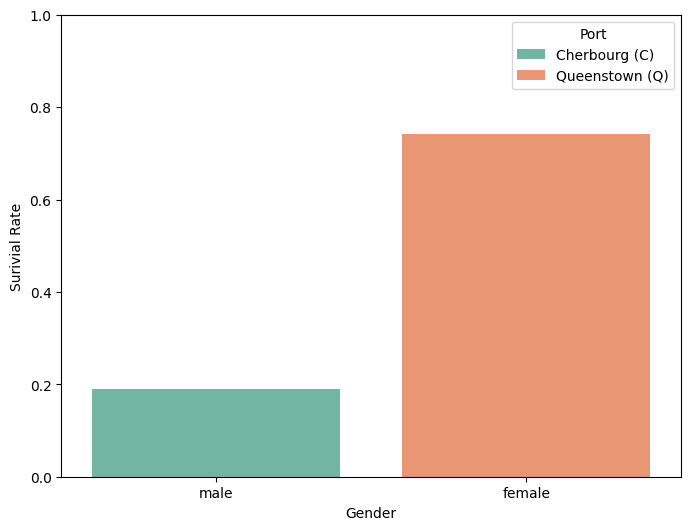

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=df, hue='Sex', palette='Set2', errorbar=None)
plt.xlabel('Gender')
plt.ylabel('Surivial Rate')
plt.legend(title='Port', labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.ylim(0,1)

plt.show()

# plt.figure(figsize=(8, 4.5))

# ax = sns.barplot(x='Sex', y='Survived', hue='Sex', data=df,
#                  palette='Set2', errorbar=None)

# plt.title('Survival Rate by Gender and Port of Embarkation', fontsize=14, pad=12)
# plt.xlabel('Gender')
# plt.ylabel('Survival Rate')
# plt.ylim(0, 1)

# # Fix legend
# plt.legend(title='Port', 
#            labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'],
#            loc='upper right')

# # Add numbers on top of bars (automatic & clean)
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.3f', fontsize=10, fontweight='bold')

# plt.tight_layout()
# plt.show()




In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1


In [55]:


titanic = df.copy()

titanic = titanic.dropna(subset=['Age'])

titanic['Age_Group'] = pd.qcut(titanic['Age'], q=5, labels=['Very Young', 'Young', 'Middle', 'Older', 'Senior'])

survival_table = titanic.groupby(['Pclass', 'Age_Group'], observed=False)['Survived'].mean()

survival_table = survival_table.unstack()
survival_table

Age_Group,Very Young,Young,Middle,Older,Senior
Pclass,,,,,
1,0.809524,0.761905,0.666667,0.777778,0.506667
2,0.742857,0.400000,0.416667,0.461538,0.363636
3,0.333333,0.197674,0.283582,0.166667,0.088235


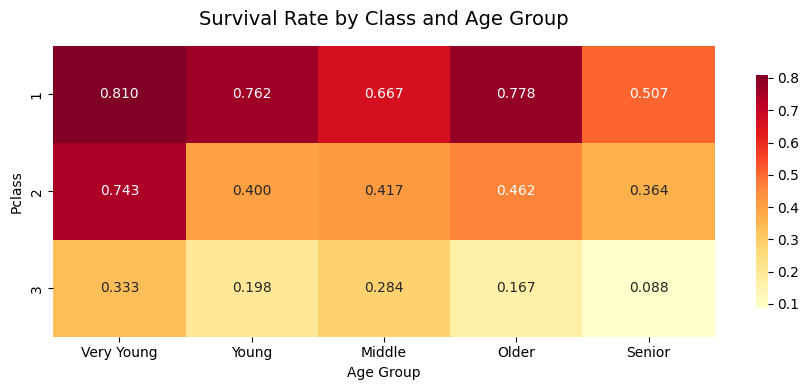

In [56]:
plt.figure(figsize=(9, 4))
sns.heatmap(survival_table, annot=True, fmt='.3f', cmap='YlOrRd',
            cbar_kws={'shrink': 0.8})
plt.title('Survival Rate by Class and Age Group', fontsize=14, pad=15)
plt.xlabel('Age Group')
plt.ylabel('Pclass')
plt.tight_layout()
plt.show()